## Preprocessing:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data=pd.read_csv(r'PRSA_Data_Wanliu_20130301-20170228.csv')

In [3]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
data.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [6]:
unique_Month = pd.unique(data['month'])
temp_data = data.copy() 
col = ["PM2.5", 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN','WSPM']
for i in unique_Month:
    Month_filtr = temp_data['month'] == i
    fitered_data = temp_data[Month_filtr]
    
    for j in col:
        mean = np.round(np.mean(fitered_data[j]), 2)
        if ~np.isnan(mean):
            fitered_data[j] = fitered_data[j].fillna(mean)
        else:
            all_data_mean = np.round(np.mean(data[j]),2)
            fitered_data[j] = fitered_data[j].fillna(all_data_mean)            
    temp_data[Month_filtr] = fitered_data

data = temp_data.copy() 

C:\Users\ARUNKA~1\AppData\Local\Temp/ipykernel_55712/3919109578.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitered_data[j] = fitered_data[j].fillna(mean)


In [7]:
data.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         123
WSPM         0
station      0
dtype: int64

In [8]:
data.drop(columns=['wd','station'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   35064 non-null  float64
 6   PM10    35064 non-null  float64
 7   SO2     35064 non-null  float64
 8   NO2     35064 non-null  float64
 9   CO      35064 non-null  float64
 10  O3      35064 non-null  float64
 11  TEMP    35064 non-null  float64
 12  PRES    35064 non-null  float64
 13  DEWP    35064 non-null  float64
 14  RAIN    35064 non-null  float64
 15  WSPM    35064 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 4.3 MB


<AxesSubplot:>

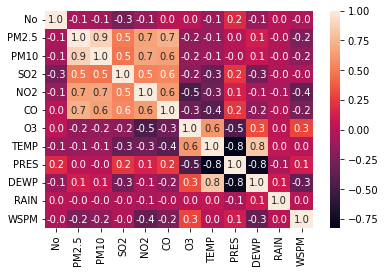

In [10]:
import seaborn as sns
sns.heatmap(data.drop(["year", "month", "day", "hour", "day"], axis=1).corr(),annot=True,fmt= '.1f')

# For PM2.5:

## rolling average:

In [11]:
rolling=data['PM2.5'].rolling(12, min_periods=1).mean()

<AxesSubplot:>

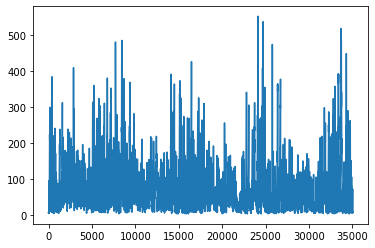

In [12]:
rolling.plot()

In [13]:
x=data.drop(columns=['PM2.5'],axis=1)

In [14]:
y=data['PM2.5']

## seasonal decompose:

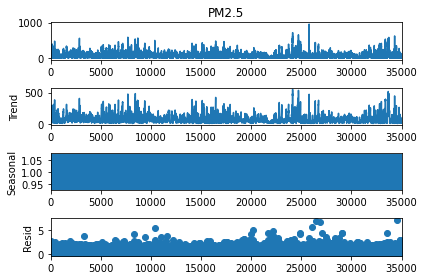

In [15]:
decompose = seasonal_decompose(data['PM2.5'],period = 12, model = 'multiplicative').plot()
plt.show()

## Augmented Dickey-Fuller Test:

In [16]:
res = adfuller(y)  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

Augmented Dickey-Fuller Statistic: -18.933916
p-value: 0.000000


## ACF:

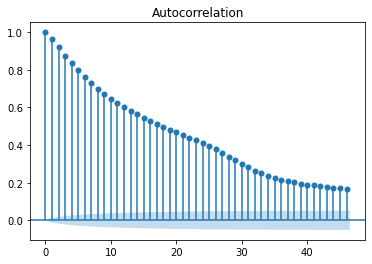

In [17]:
plot_acf(y)
plt.show()

## PACF:

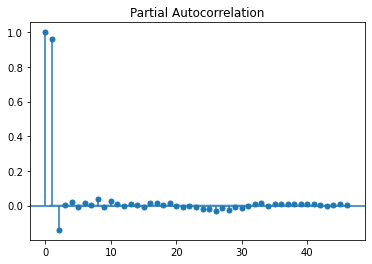

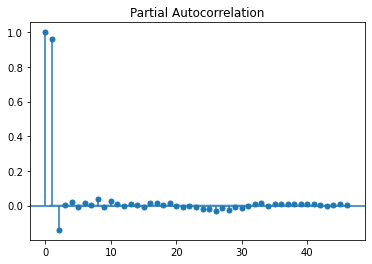

In [24]:
plot_pacf(y)

## ARIMA and Forecasting:

In [25]:
model = ARIMA(y, order=(2,0,1)) 
results_ARIMA = model.fit()
results_ARIMA.summary()

C:\python_anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                35064
Model:                     ARMA(2, 0)   Log Likelihood             -157336.581
Method:                       css-mle   S.D. of innovations             21.502
Date:                Sun, 16 Apr 2023   AIC                         314681.162
Time:                        09:36:36   BIC                         314715.022
Sample:                             0   HQIC                        314691.946
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          83.2906      2.782     29.936      0.000      77.838      88.744
ar.L1.PM2.5     1.0988      0.005    207.810      0.000       1.088       1.109
ar.L2.PM2.5    -0.1401      0.005    -26.488      0.000      -0.150      -0.130
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0508           +0.0000j            1.0508            0.0000
AR.2            6.7945           +0.0000j            6.7945            0.0000
-----------------------------------------------------------------------------
"""

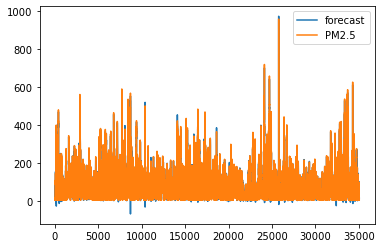

In [26]:
results_ARIMA.plot_predict()
plt.show()


# For PM10:

## rolling average:

<AxesSubplot:>

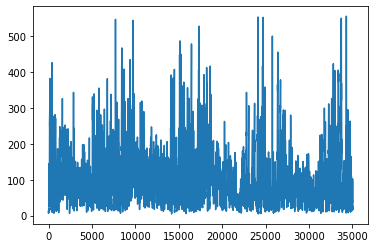

In [28]:
rolling1=data['PM10'].rolling(12, min_periods=1).mean()
rolling1.plot()

## seasonal decompose:

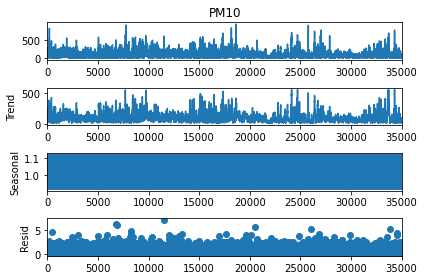

In [30]:
decompose = seasonal_decompose(data['PM10'],period = 12, model = 'multiplicative').plot()
plt.show()

## ADF test:

In [32]:
res1 = adfuller(data['PM10'])  
print('Augmented Dickey-Fuller Statistic: %f' % res1[0])  
print('p-value: %f' % res1[1]) 

Augmented Dickey-Fuller Statistic: -19.052264
p-value: 0.000000


## ACF:

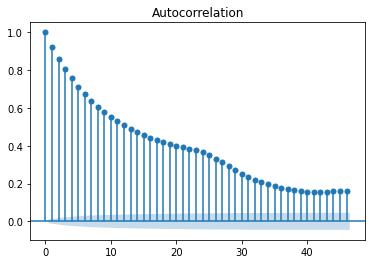

In [33]:
plot_acf(data['PM10'])
plt.show()

## PACF:

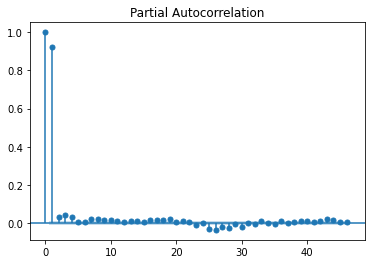

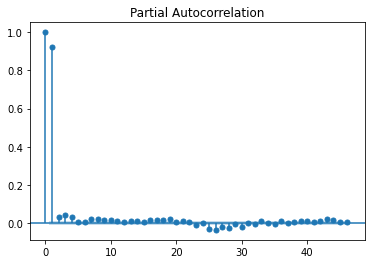

In [34]:
plot_pacf(data['PM10'])

## ARIMA and Forecasting:

In [35]:
model1 = ARIMA(data['PM10'], order=(2,0,1)) 
results_ARIMA1 = model.fit()
results_ARIMA1.summary()

C:\python_anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                35064
Model:                     ARMA(2, 0)   Log Likelihood             -157336.581
Method:                       css-mle   S.D. of innovations             21.502
Date:                Sun, 16 Apr 2023   AIC                         314681.162
Time:                        09:51:49   BIC                         314715.022
Sample:                             0   HQIC                        314691.946
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          83.2906      2.782     29.936      0.000      77.838      88.744
ar.L1.PM2.5     1.0988      0.005    207.810      0.000       1.088       1.109
ar.L2.PM2.5    -0.1401      0.005    -26.488      0.000      -0.150      -0.130
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0508           +0.0000j            1.0508            0.0000
AR.2            6.7945           +0.0000j            6.7945            0.0000
-----------------------------------------------------------------------------
"""

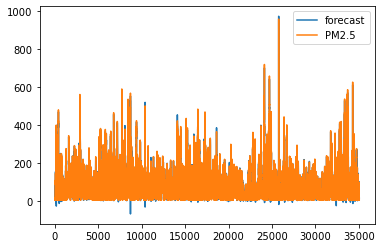

In [36]:
results_ARIMA1.plot_predict()
plt.show()